# HCA DCP User Analytics - Q1 2022 vs Q4 2021

This section displays metrics collected from Google Analytics HCA DCP Data Portal and Data Browser and compares Q1 2022 with the previous quarter (Q4 2021). The generation of this report is now coded in Jupiter notebooks and can be rerun easily and modified or consolidated as desired. 

### Geographic exclusions

The data presented excludes access from Cambridge, UK and surrounds, Cambridge MA and surrounds, and San Francisco, CA and surrounds an attempt to exclude the HCA DCP development team member activity from the report.


### Key to tables

On the tables:

* Diffs e.g. (+19.04%) compare the later quarter with the previous quarter.
* "+" Indicates the entry is new in the report in the current quarter.
* "↑" Indicates the entry has moved up in rank since the last quarter.
* "↓" Indicates the entry has moved down in rank since the last quarter.



In [19]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# DEV GUIDES
#https://developers.google.com/analytics/devguides/reporting
    




In [2]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from IPython.display import display
import os
import pprint
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

%load_ext autoreload
%autoreload 2

import analytics_package.charts as ac
import analytics_hca as hca

GA_PROPERTY = "185740629" # HCA Data Portal/Browser
DCP_ANALYTICS_START = "2019-03-01"
TODAY = 'today'
PERIOD = "2022-05"
PREV_PERIOD = "2022-04"
GEO_SEGMENT = "gaid::q-RjXBSdQ-i18vXOOoXl5g"

default_params = {
    "property": GA_PROPERTY,
    "index_key_formatter": hca.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD,
    "segment": GEO_SEGMENT
}

ac.authenticate_ga()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
ac.init_tables()

<div style="page-break-after: always"></div>

## User acquisition

### Monthly users and pageviews (all time)

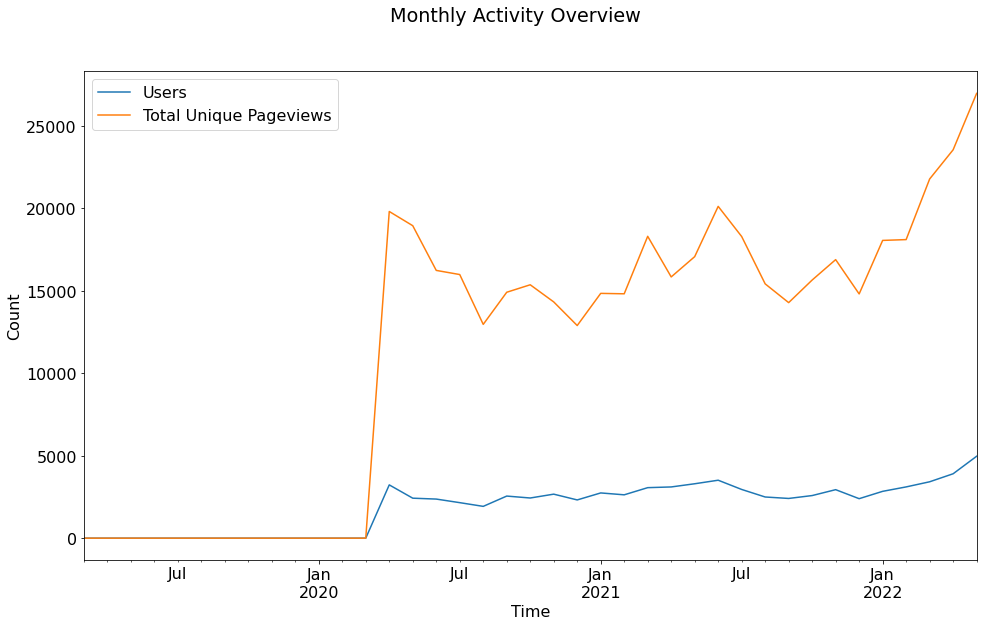

In [52]:
users_over_time_table = hca.plot_users_over_time(start_date=DCP_ANALYTICS_START, end_date=TODAY, **default_params)

### Total unique users and unique pageviews by quarter (all time)

In [53]:
display(users_over_time_table)

### Users and sessions

In [46]:
ac.show_difference_table("Total Users", None, "ga:users", None, **default_params)

In [47]:
ac.show_difference_table("Returning Users", None, "ga:users", None, filters="ga:userType==Returning Visitor", **default_params)

In [48]:
ac.show_difference_table("Total Visits", None, "ga:sessions", None, **default_params)

In [49]:
ac.show_difference_table("Sessions Including Visits to Data Portal", None, "ga:sessions", None, filters="ga:pagePath!~/explore", **default_params)

In [50]:
ac.show_difference_table("Sessions Including Visits to Data Browser", None, "ga:sessions", None, filters="ga:pagePath=~/explore", **default_params)

### Device category

In [55]:
ac.show_difference_table("Users", "Category", "ga:users","ga:deviceCategory", **default_params)

### Top referrers

In [23]:
ac.show_difference_table("Users", "Referrer", "ga:users","ga:source", **default_params)

### Top countries

In [11]:
ac.show_difference_table("Users", "Country", "ga:users","ga:country", **default_params)

### Social network referrers

In [12]:
ac.show_difference_table("User Sessions", "Social Network", "ga:sessions", "ga:socialNetwork", **default_params)

### Top entrances

In [13]:
ac.show_difference_table("Entrances", "Page", "ga:entrances","ga:pagePath", **default_params)

## Downloads and exports
### Download project manifest

In [14]:
ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Manifest", rows_type="fixed", **default_params)

### Download project matrix

In [15]:
ac.show_difference_table(["Users", "Count"], "Download Type", ["ga:users", "ga:hits"], ["ga:dimension6", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Matrix", rows_type="fixed", **default_params)

### Request curl command for selected data

In [64]:
ac.show_difference_table(["Users", "Count"], "curl Request From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventAction==Request;ga:dimension1==Bulk Download", rows_type="fixed", **default_params)

### Metadata request/download from selected data

In [66]:
ac.show_difference_table(["Users", "Count"], "Metadata Request/Download From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Manifest;ga:eventAction=~Request|Download;ga:dimension1=~Cohort Manifest|Cohort Manifest Link", rows_type="fixed", **default_params)

### Request export from selected data

In [67]:
ac.show_difference_table(["Users", "Count"], "Request Export From Search Results", ["ga:users", "ga:hits"], ["ga:dimension3", "ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Export;ga:eventAction==Request;ga:dimension1==Cohort Export;ga:dimension3==Terra", rows_type="fixed", **default_params)

### Direct file downloads (from files tab)

In [68]:
ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==File;ga:eventAction==Download", rows_type="fixed", **default_params)

### Top direct file download file types (from files tab)

In [16]:
ac.show_difference_table("Downloads", "File Type", "ga:hits", "ga:dimension6", filters="ga:eventCategory==File;ga:eventAction==Download", **default_params)

### Top "export selected data" queries

In [7]:
ac.show_difference_table("Selected for Export Count", "Query", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~/explore/export/export-to-terra|/explore/export/get-curl-command|/explore/export/download-manifest", **default_params)

## Entities
### Entity tabs selections (project, samples, files)

In [73]:
ac.show_difference_table("Count", "Entity Tab", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Entity;ga:eventAction==Select Tab", **default_params)

## Search facets
### Top facets

In [74]:
ac.show_difference_table("Count", "Facet", "ga:hits", "ga:dimension9", filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

### Top facet terms

In [75]:
ac.show_difference_table("Count", ["Facet", "Term"], "ga:hits", ["ga:dimension9", "ga:dimension10"], filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

## Projects
### Top project detail pages

In [76]:
ac.show_difference_table("Count", "Project", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~^(\\/explore\\/projects\\/[0-9a-fA-F]{8}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{12})(\\/?\\?{0}|\\/?\\?{1}.*)$", **default_params)

### Project detail supplementary links visits (from external resources)

In [77]:
ac.show_difference_table("Visits", "Link", "ga:hits", ["ga:dimension4", "ga:dimension6", "ga:eventLabel"], filters="ga:eventCategory==Project;ga:eventAction==View External Resource", **default_params)

### Withdrawn/deprecated projects visits

In [65]:
ac.show_difference_table("Count", "Project Type", "ga:hits", "ga:eventAction", filters="ga:eventAction=~View Deprecated Project|View Withdrawn Project", **default_params)

### Analysis protocol portal links

In [69]:
ac.show_difference_table("Count", "Analysis Protocol", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Portal Link;ga:eventAction==Click", **default_params)

## Data Portal
### Top landing pages

In [8]:
ac.show_difference_table("Count", "Path", "ga:entrances", "ga:landingPagePath", filters="ga:landingPagePath!~^\/explore", **default_params)

### Top pages

In [70]:
ac.show_difference_table("Count", "Path", "ga:pageviews", "ga:pagePath", filters="ga:pagePath!~^\/explore", **default_params)

### Top searches

In [71]:
ac.show_difference_table("Count", "Search Text", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Enter Text", **default_params)

### Top selected search results

In [72]:
ac.show_difference_table("Count", "Search Result", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Click", **default_params)